# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Descrição dos dados

### Importação dos dados

In [2]:
df = pd.read_csv('../data/raw/mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Descrição das colunas

### Informações sobre o dataset

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,consumo do veículo em milhas por galão (mpg),quantitativa,continua
1,cylinders,quantidade de cilindros do motor,quantitativa,discreta
2,displacement,"cilindrada, capacidade em litros do motor",quantitativa,continua
3,horsepower,potência gerada pelo motor em horsepower (hp),quantitativa,continua
4,weight,peso total do veículo,quantitativa,discreta
5,acceleration,aceleração,quantitativa,continua
6,model_year,ano de fabricação do veículo de forma abreviad...,quantitativa,discreta
7,origin,sigla do país onde o veículo foi fabricado,qualitativa,nominal
8,name,nome do veículo,qualitativa,nominal


In [4]:
print(dicionario['tipo'].value_counts())
print(dicionario['subtipo'].value_counts())

quantitativa    7
qualitativa     2
Name: tipo, dtype: int64
continua    4
discreta    3
nominal     2
Name: subtipo, dtype: int64


In [5]:
print('Dados faltantes:')
print(df.isna().sum())
print('\nFormato:')
print('Linhas: ', df.shape[0], 'Colunas: ', df.shape[1])

Dados faltantes:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Formato:
Linhas:  398 Colunas:  9


O dataset possui:
 - 7 variáveis quantitativas, sendo 4 continuas e 3 discretas
 - 2 qualitativas nominais
 - 398 linhas
 - 9 colunas
 - 6 dados faltantes em `horsepower`

O dataset `mpg` traz caracteristicas de desempenho referentes a diversos carros, <br/>assim como informa sobre
sua origem de fabricação e ano.

## 2. Perguntas de partida e hipóteses

 - Quais as distribuições das variáveis?
     - Qual carro consome mais?
     - Qual carro é o mais potente?
     - Qual carro é o mais antigo? E o mais novo?
 - Qual a relação entre consumo (mpg) e as outras variáveis?
 - Quais as principais fabricantes dos carros?
     - Quais fabricantes possuem os carros mais potentes? E os que consomem mais?
     - De quais países são essas fabricantes?

#### Quais as distribuições das variáveis?

In [6]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


 - O desempenho médio é de `23,51 milhas por galão (mpg)`
 - O mais econômico alcança `9 mpg` enquanto o mais econômico consegue `46,6 mpg`, variando `7,81 mpg` em média
 - O mais potente possui `230hp` enquanto o menos potente `46hp`, a potencia média é de `104hp` aproximadamente
 - O carro mais antigo foi construido em `1970`, já o mais novo em `1982`

#### Qual a relação entre consumo (mpg) e as outras variáveis?

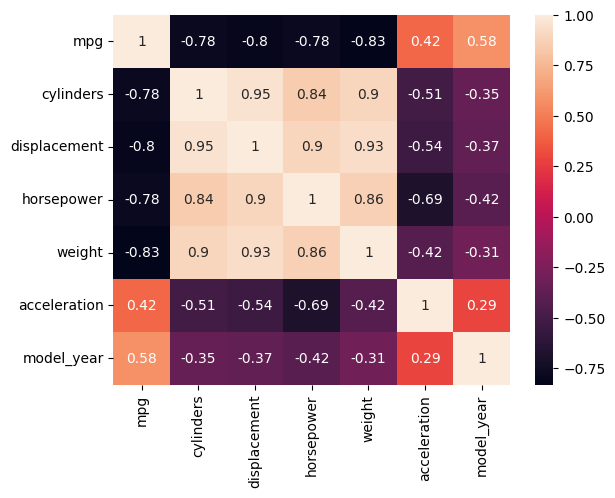

In [7]:
correlacoes = df.corr(numeric_only=True)
sns.heatmap(correlacoes, annot=True)
plt.show()

 - O desempenho possui forte correlação negativa com todas as variaveis, exceto `acceleration` e `model_year`
 - Importante notar a alta correlação entre `cylinders`, `displacement`, `horsepower` e `weight`, indicando que uma variação em qualquer uma delas afeta as outras

/home/pedro/.cache/pypoetry/virtualenvs/src-UYlcWzEu-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


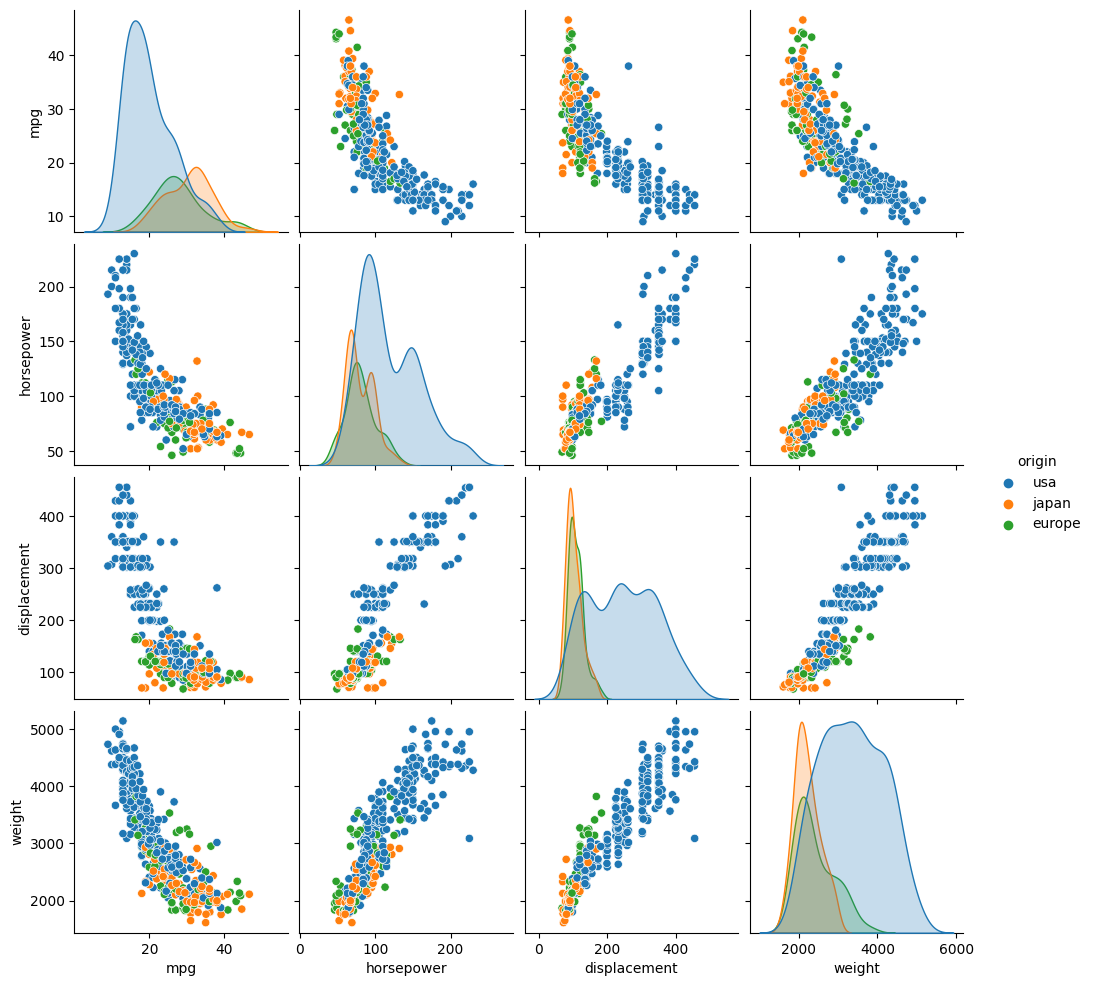

In [8]:
mpg_hp = df.loc[:,['mpg','horsepower','displacement','weight', 'origin']]
# plt.scatter(x=mpg_hp['mpg'], y=mpg_hp['horsepower'])
sns.pairplot(data=mpg_hp, hue='origin')
plt.show()

#### Quais as principais fabricantes dos carros?

In [9]:
df['fabricante'] = df['name'].apply(lambda x: x.split()).apply(lambda x: x[0])

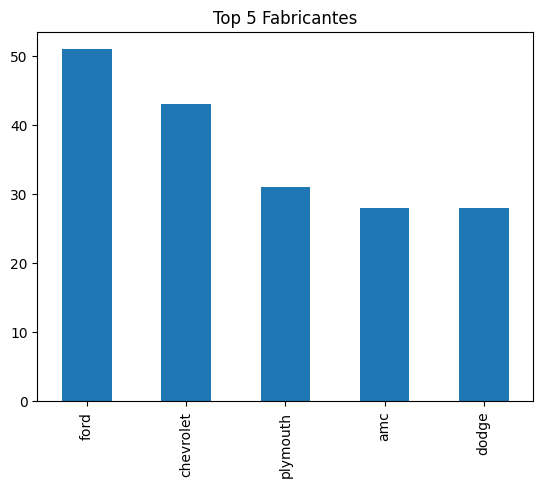

In [10]:
df['fabricante'].value_counts().head().plot(kind='bar',title='Top 5 Fabricantes')
plt.show()

#### Quais fabricantes possuem os carros mais potentes? E os que consomem mais?

<Axes: >

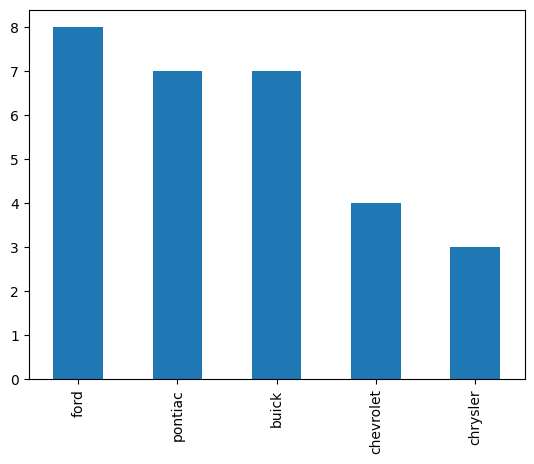

In [11]:
df.loc[df['horsepower'] > 150].sort_values(by='horsepower', ascending=False)['fabricante'].value_counts().head().plot(kind='bar')

In [12]:
df.loc[:,['fabricante', 'horsepower']].sort_values(by='horsepower', ascending=False).head()

,fabricante,horsepower
116,pontiac,230.0
95,buick,225.0
13,buick,225.0
8,pontiac,225.0
6,chevrolet,220.0


A `Ford` possui 8 carros com mais de 150 cavalos, seguida por `Pontiac` e `Buick` com 7 cada, enquanto o carro mais potente pertence à `Pontiac` com `230hp`

#### Qual consome mais?

In [13]:
df.loc[:,['fabricante', 'mpg']].sort_values(by=('mpg')).head()

,fabricante,mpg
28,hi,9.0
25,ford,10.0
26,chevy,10.0
103,chevrolet,11.0
124,oldsmobile,11.0


A fabricante `Hi` tem o carro com o consumo menos eficiente, alcançando apenas `9.0mpg`

<Axes: >

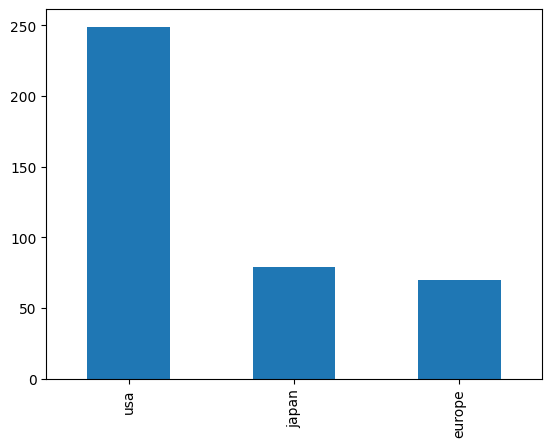

In [14]:
df.loc[:,['fabricante','origin']]['origin'].value_counts().plot(kind='bar')

## 3. Insights

Podemos destacar da exploração de dados acima que:
 - O desempenho medido em `mpg` é fortemente correlacionado, negativamente, com a cilindrada, o numero de cilindros, o peso e a potencia, indicando que quanto maior forem os numeros destes, o desempenho cai, e que entre si, estes mesmos parametros são fortemente correlacionados, positivamente
 
 - A maioria das fabricantes pertence aos `USA`
 
 - Os carros americanos são os mais potentes, porém os que consomem mais
 
 - Os japoneses são os que tem melhor consumo, porém são menos potentes e tem menos cilindradas, assim como os europeus